Links
https://github.com/robertmartin8/MachineLearningStocks

GB
https://github.com/PythonProgramming/Support-Vector-Machines---Basics-and-Fundamental-Investing-Project


# Topic2

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import svm
import numpy as np
import pandas as pd

# SVM
> how to devide groups of data

In [2]:
digits = datasets.load_digits()

In [3]:
digits.data, \
digits.target, \
digits.images[0]

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]),
 array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]))

Everything need to be converted and normilized data (house price 200K => (-1, 1))

array([9])

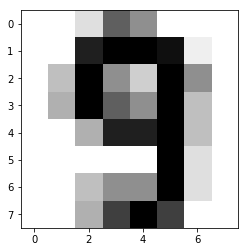

In [4]:
# Training
x,y = digits.data[:-10], digits.target[:-10] # [:-1] all of the data

# Classifier
clf = svm.SVC(gamma=0.001, C=100)
clf.fit(x, y); # Fit - fit line between numbers

# Predict
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r);

clf.predict(digits.data[[-2]])

Fit is line 
Overfit is curve between points
Gamma - gradient descent technique, how many leaps needed to reach bottom point of 'U' form

# Part3
> https://www.youtube.com/watch?v=AleGZ9dkfPs&index=3&list=PLQVvvaa0QuDd0flgGphKCej-9jp-QdzZ3

Choose rigt **estimator**
[sklearn](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

<img src="http://scikit-learn.org/stable/_static/ml_map.png">

https://s3-eu-west-1.amazonaws.com/fayimora.com/2017/04/RoadToDataScientist1.png

## Acquire data

Challenges for finance
1. Organize data
2. Label company (Buy/Sell)
3. Resource of data (paid, hard to get, getting/parsing data can be illegal because DDS)

Stock fundamentals
- try no DDOS


Search for AAPL
https://www.sec.gov/cgi-bin/browse-edgar?CIK=aapl&owner=exclude&action=getcompany&Find=Search

Documents Annual **10K** and Quarter **10Q**

Yahoo stock stats
https://finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL

Features:
- Sector
- Trailing P/E (~12)
- Debt/Equity
- Price/Book (~6), but for maining ~>0 (because is nothing except tools)



[1]


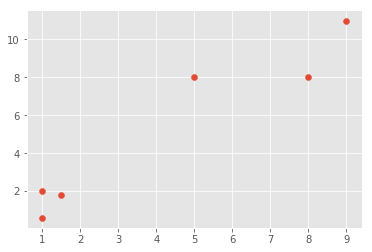

In [5]:
from matplotlib import style
style.use('ggplot')

x=[1,5,1.5,8,1,9]
y=[2,8,1.8,8,0.6,11]
# ACTUALLY data should be scalled

plt.scatter(x, y);

# Clasify chart data
X = np.array([list(z) for z in zip(x, y)])
Y = [0, 1, 0, 1,0,1]

# Use SVC classifier Support Vector Machines
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, Y)

#Predict
print(clf.predict([[10,20]]))

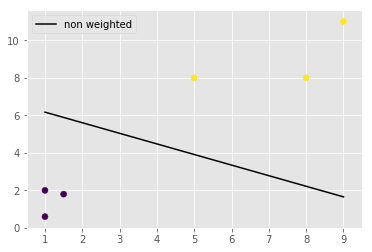

In [6]:
# DRAW this coef line
def get_split_line(clf, X):
    w = clf.coef_[0]
    a = -w[0]/w[1]
    xx = np.linspace(min(X[:,0]), max(X[:,0]))
    yy = a*xx -clf.intercept_[0]/w[1]
    return [xx, yy]

def plot_with_divider(clf, X, y):
    [xx, yy] = get_split_line(clf, X)
    h0 = plt.plot(xx, yy, 'k-', label="non weighted")

    plt.scatter(X[:, 0], X[:,1], c=y) # X[:, 0] => dig into all of first
    plt.legend()
    return plt
    
plot_with_divider(clf, X, Y);

# Part 13

In [7]:
# Get in p.12
ks = pd.read_csv('./infraQuarter/key_stats.csv');
ks.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 45 columns):
Unnamed: 0                   1761 non-null int64
Date                         1761 non-null object
Unix                         1761 non-null float64
Ticker                       1761 non-null object
Price                        1761 non-null float64
stock_p_change               1761 non-null float64
SP500                        1761 non-null float64
sp500_p_change               1761 non-null float64
Difference                   1761 non-null float64
DE Ratio                     1761 non-null float64
Trailing P/E                 1761 non-null float64
Price/Sales                  1761 non-null float64
Price/Book                   1761 non-null float64
Profit Margin                1761 non-null float64
Operating Margin             1761 non-null float64
Return on Assets             1761 non-null float64
Return on Equity             1761 non-null float64
Revenue Per Share            1

In [8]:
feat = ["DE Ratio", "Trailing P/E"]
perform_dic = {'underperform': 0, 'outperform': 1};
# Trained data
def get_data(feat=feat):
    df = ks[:500]
    X = df[feat].values
    y = df['Status'].map(perform_dic);
    return X, y
# CLF-SVM_SVC
def fitClf(X,y):
    clf = svm.SVC(kernel='linear', C=1.0);
    clf.fit(X, y);
    return clf;
# Plot
def plot_with_features(clf, X, y, feat=feat):
    plt = plot_with_divider(clf, X, y);
    plt.xlabel(feat[0]);
    plt.ylabel(feat[1]);

    
x, Y = get_data();
clf = fitClf(X,y);
plot_with_features(clf, X, y, feat);


ValueError: Unknown label type: 'continuous'

In [ ]:

FEATURES =  [
  'DE Ratio',
  'Trailing P/E',
  'Price/Sales',
  'Price/Book',
  'Profit Margin',
  'Operating Margin',
  'Return on Assets',
  'Return on Equity',
  'Revenue Per Share',
  'Market Cap',
  'Enterprise Value',
  'Forward P/E',
  'PEG Ratio',
  'Enterprise Value/Revenue',
  'Enterprise Value/EBITDA',
  'Revenue',
  'Gross Profit',
  'EBITDA',
  'Net Income Avl to Common ',
  'Diluted EPS',
  'Earnings Growth',
  'Revenue Growth',
  'Total Cash',
  'Total Cash Per Share',
  'Total Debt',
  'Current Ratio',
  'Book Value Per Share',
  'Cash Flow',
  'Beta',
  'Held by Insiders',
  'Held by Institutions',
  'Shares Short (as of',
  'Short Ratio',
  'Short % of Float',
  'Shares Short (prior '
];


In [ ]:
from sklearn import preprocessing

def get_prep_data(feat=feat):
    X, y = get_data(feat);
    #X = preprocessing.scale(X)
    return X, y;

X, y = get_data(FEATURES);
clf = fitClf(X,y);
plot_with_features(clf, X, y, FEATURES);
1